# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [41]:
#Importando as bibiliotecas e rodando o CSV.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  # FutureWarning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

import graphviz
import dtreeviz

%matplotlib inline

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

X = boston.drop(columns= ['medv']).copy()
y = boston [['medv']]


In [42]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [43]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [44]:
#O info da uma primeira vizualização no banco de dados.
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [45]:
#Uso o drop_duplicate para avaliar que nao existem linhas repetidas

boston.drop_duplicates()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [46]:
#O corr verifica a existencia de alguma correlação entre as variáveis

correlacao = boston.corr()

In [47]:
correlacao[correlacao > 0.7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zn,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,1.000000,NaN,0.763651,NaN,NaN,NaN,NaN,0.720760,NaN,NaN,NaN,NaN
chas,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,0.763651,NaN,1.000000,NaN,0.73147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,0.731470,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
tax,NaN,NaN,0.720760,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


In [48]:
correlacao[correlacao < -0.7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.708027,NaN,NaN,NaN,NaN,NaN,NaN
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.769230,NaN,NaN,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.747881,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,NaN,-0.708027,NaN,-0.76923,NaN,-0.747881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Separe os dados em validação e teste

In [49]:
#Treinando os dados em validação e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2402)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (379, 13)
X_test: (127, 13)
y_train: (379, 1)
y_test: (127, 1)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [50]:
#Fit regression model

tree_1 = DecisionTreeRegressor(max_depth=8, random_state=2402)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2402)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2402)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [51]:
mse1_train = mean_squared_error(y_true=y_train, y_pred=tree_1.predict(X_train))
mse1_test = mean_squared_error(y_true=y_test, y_pred=tree_1.predict(X_test))

mse2_train = mean_squared_error(y_true=y_train, y_pred=tree_2.predict(X_train))
mse2_test = mean_squared_error(y_true=y_test, y_pred=tree_2.predict(X_test))

template = 'O erro quadrático médio (MSE) da árvore com profunidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', mse1_train).replace('.', ','))
print(template.format(tree_1.get_depth(), 'teste', mse1_test).replace('.', ','), '\n')

print(template.format(tree_2.get_depth(), 'treino', mse2_train).replace('.', ','))
print(template.format(tree_2.get_depth(), 'teste', mse2_test).replace('.', ','))

O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de treino é: 1,84
O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de teste é: 12,65 

O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de treino é: 27,11
O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de teste é: 21,70


In [52]:
r2_1_train = tree_1.score(X=X_train, y=y_train)
r2_2_train = tree_2.score(X=X_train, y=y_train)

r2_1_test = tree_1.score(X=X_test, y=y_test)
r2_2_test = tree_2.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (R-quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', r2_1_train).replace(".", ","))
print(template.format(tree_1.get_depth(), 'teste', r2_1_test).replace(".", ","), '\n')

print(template.format(tree_2.get_depth(), 'treino', r2_2_train).replace(".", ","))
print(template.format(tree_2.get_depth(), 'teste', r2_2_test).replace(".", ","))

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de treino é: 0,98
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de teste é: 0,85 

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de treino é: 0,68
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de teste é: 0,74


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [53]:
print(f'A árvore que parece mais adequada é tree_1 com profundidade = {tree_1.get_depth()}')

tree_1

A árvore que parece mais adequada é tree_1 com profundidade = 8


DecisionTreeRegressor(max_depth=8, random_state=2402)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

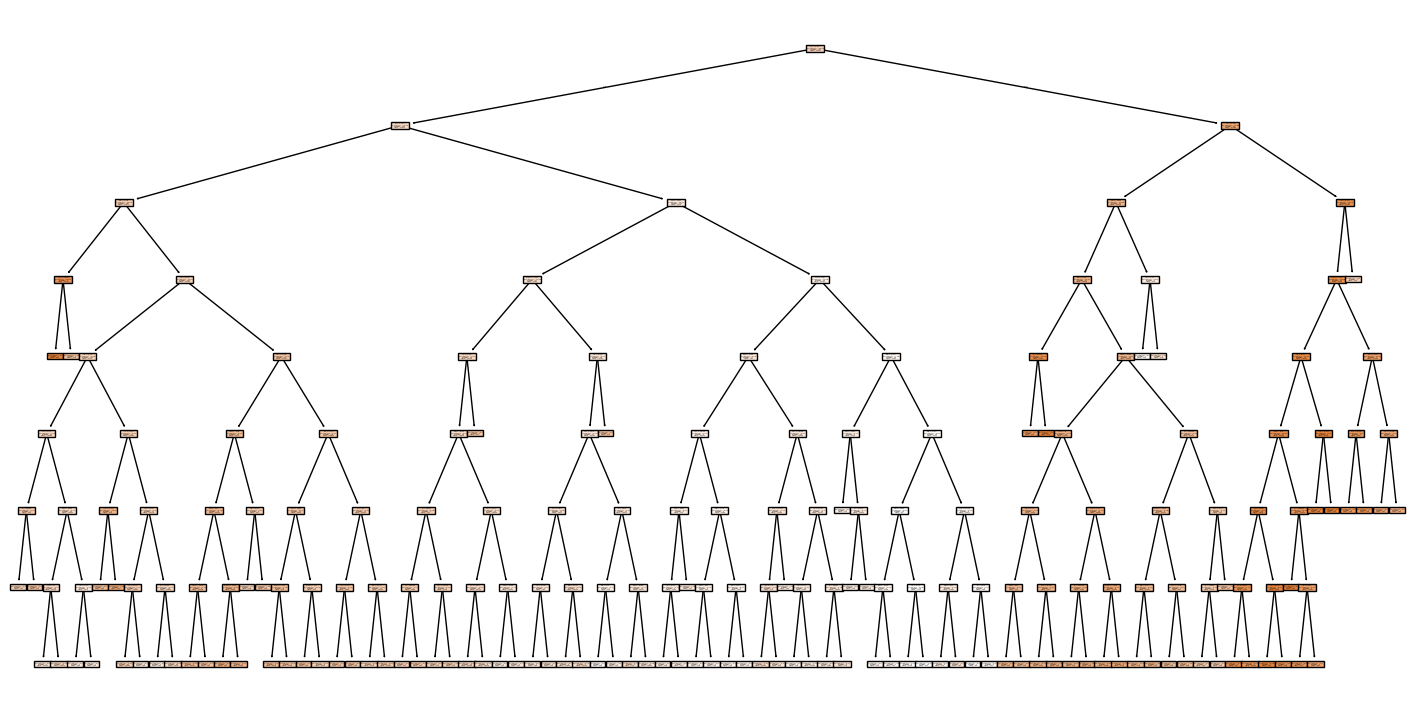

In [54]:
#Visualizar a forma gráfica da árvore com plot_tree

plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=tree_1, 
                    feature_names=X.columns, 
                    filled=True)

## Represetação impressa da árvore.

In [56]:
text_tree_print = tree.export_text(decision_tree=tree_1)

print(text_tree_print)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- feature_5 <= 4.41
|   |   |   |   |   |   |--- feature_11 <= 243.06
|   |   |   |   |   |   |   |--- value: [23.10]
|   |   |   |   |   |   |--- feature_11 >  243.06
|   |   |   |   |   |   |   |--- value: [27.50]
|   |   |   |   |   |--- feature_5 >  4.41
|   |   |   |   |   |   |--- feature_6 <= 98.65
|   |   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |   |--- value: [16.13]
|   |   |   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |   |   |--- value: [20.31]
|   |   |   |   |   |   |--- feature_6 >  98.65
|   |   |   |   |   |   |   |--- feature_5 <= 5.91
|   |   |   |   |   |   |   |  

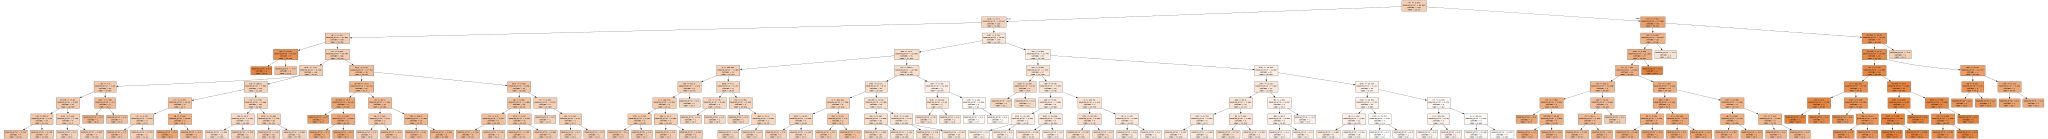

In [55]:
#Possivelmente, a variável mais importante na árvore é o número médio de quartos rm. Dado que ele é o nó principal.

import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None, 
                                feature_names=x.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph